In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
import os
import tqdm
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [9]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in tqdm.tqdm(os.listdir("PetImages/"+class_name)):
        if class_name == "Cat":
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

100%|████████████████████████████████████████████████████████████████████████| 12501/12501 [00:00<00:00, 249997.59it/s]

PetImages\Cat\0.jpg 0


In [10]:
df = pd.DataFrame()
df['images'] = input_path
df['label']  = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages\Dog\9050.jpg      1
1    PetImages\Dog\67.jpg      1
2  PetImages\Dog\4581.jpg      1
3  PetImages\Cat\2838.jpg      0
4  PetImages\Cat\6269.jpg      0

In [11]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)


PetImages\Cat\Thumbs.db
PetImages\Dog\Thumbs.db


In [12]:
df = df[df['images']!='PetImages\Dog\Thumbs.db'] 
df = df[df['images']!='PetImages\Cat\Thumbs.db']
df = df[df['images']!='PetImages\Dog\11702.jpg'] 
df = df[df['images']!='PetImages\Cat\666.jpg']
len(df)

25000

In [13]:
import PIL
l = []
for image in df['images']:
    try:        
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages\\Dog\\11702.jpg', 'PetImages\\Cat\\666.jpg']

In [14]:
df = df[df['images']!=rf'PetImages\Dog\Thumbs.db'] 
df = df[df['images']!=rf'PetImages\Cat\Thumbs.db']
df = df[df['images']!=rf'PetImages\Dog\11702.jpg'] 
df = df[df['images']!=rf'PetImages\Cat\666.jpg']
len(df)

24998

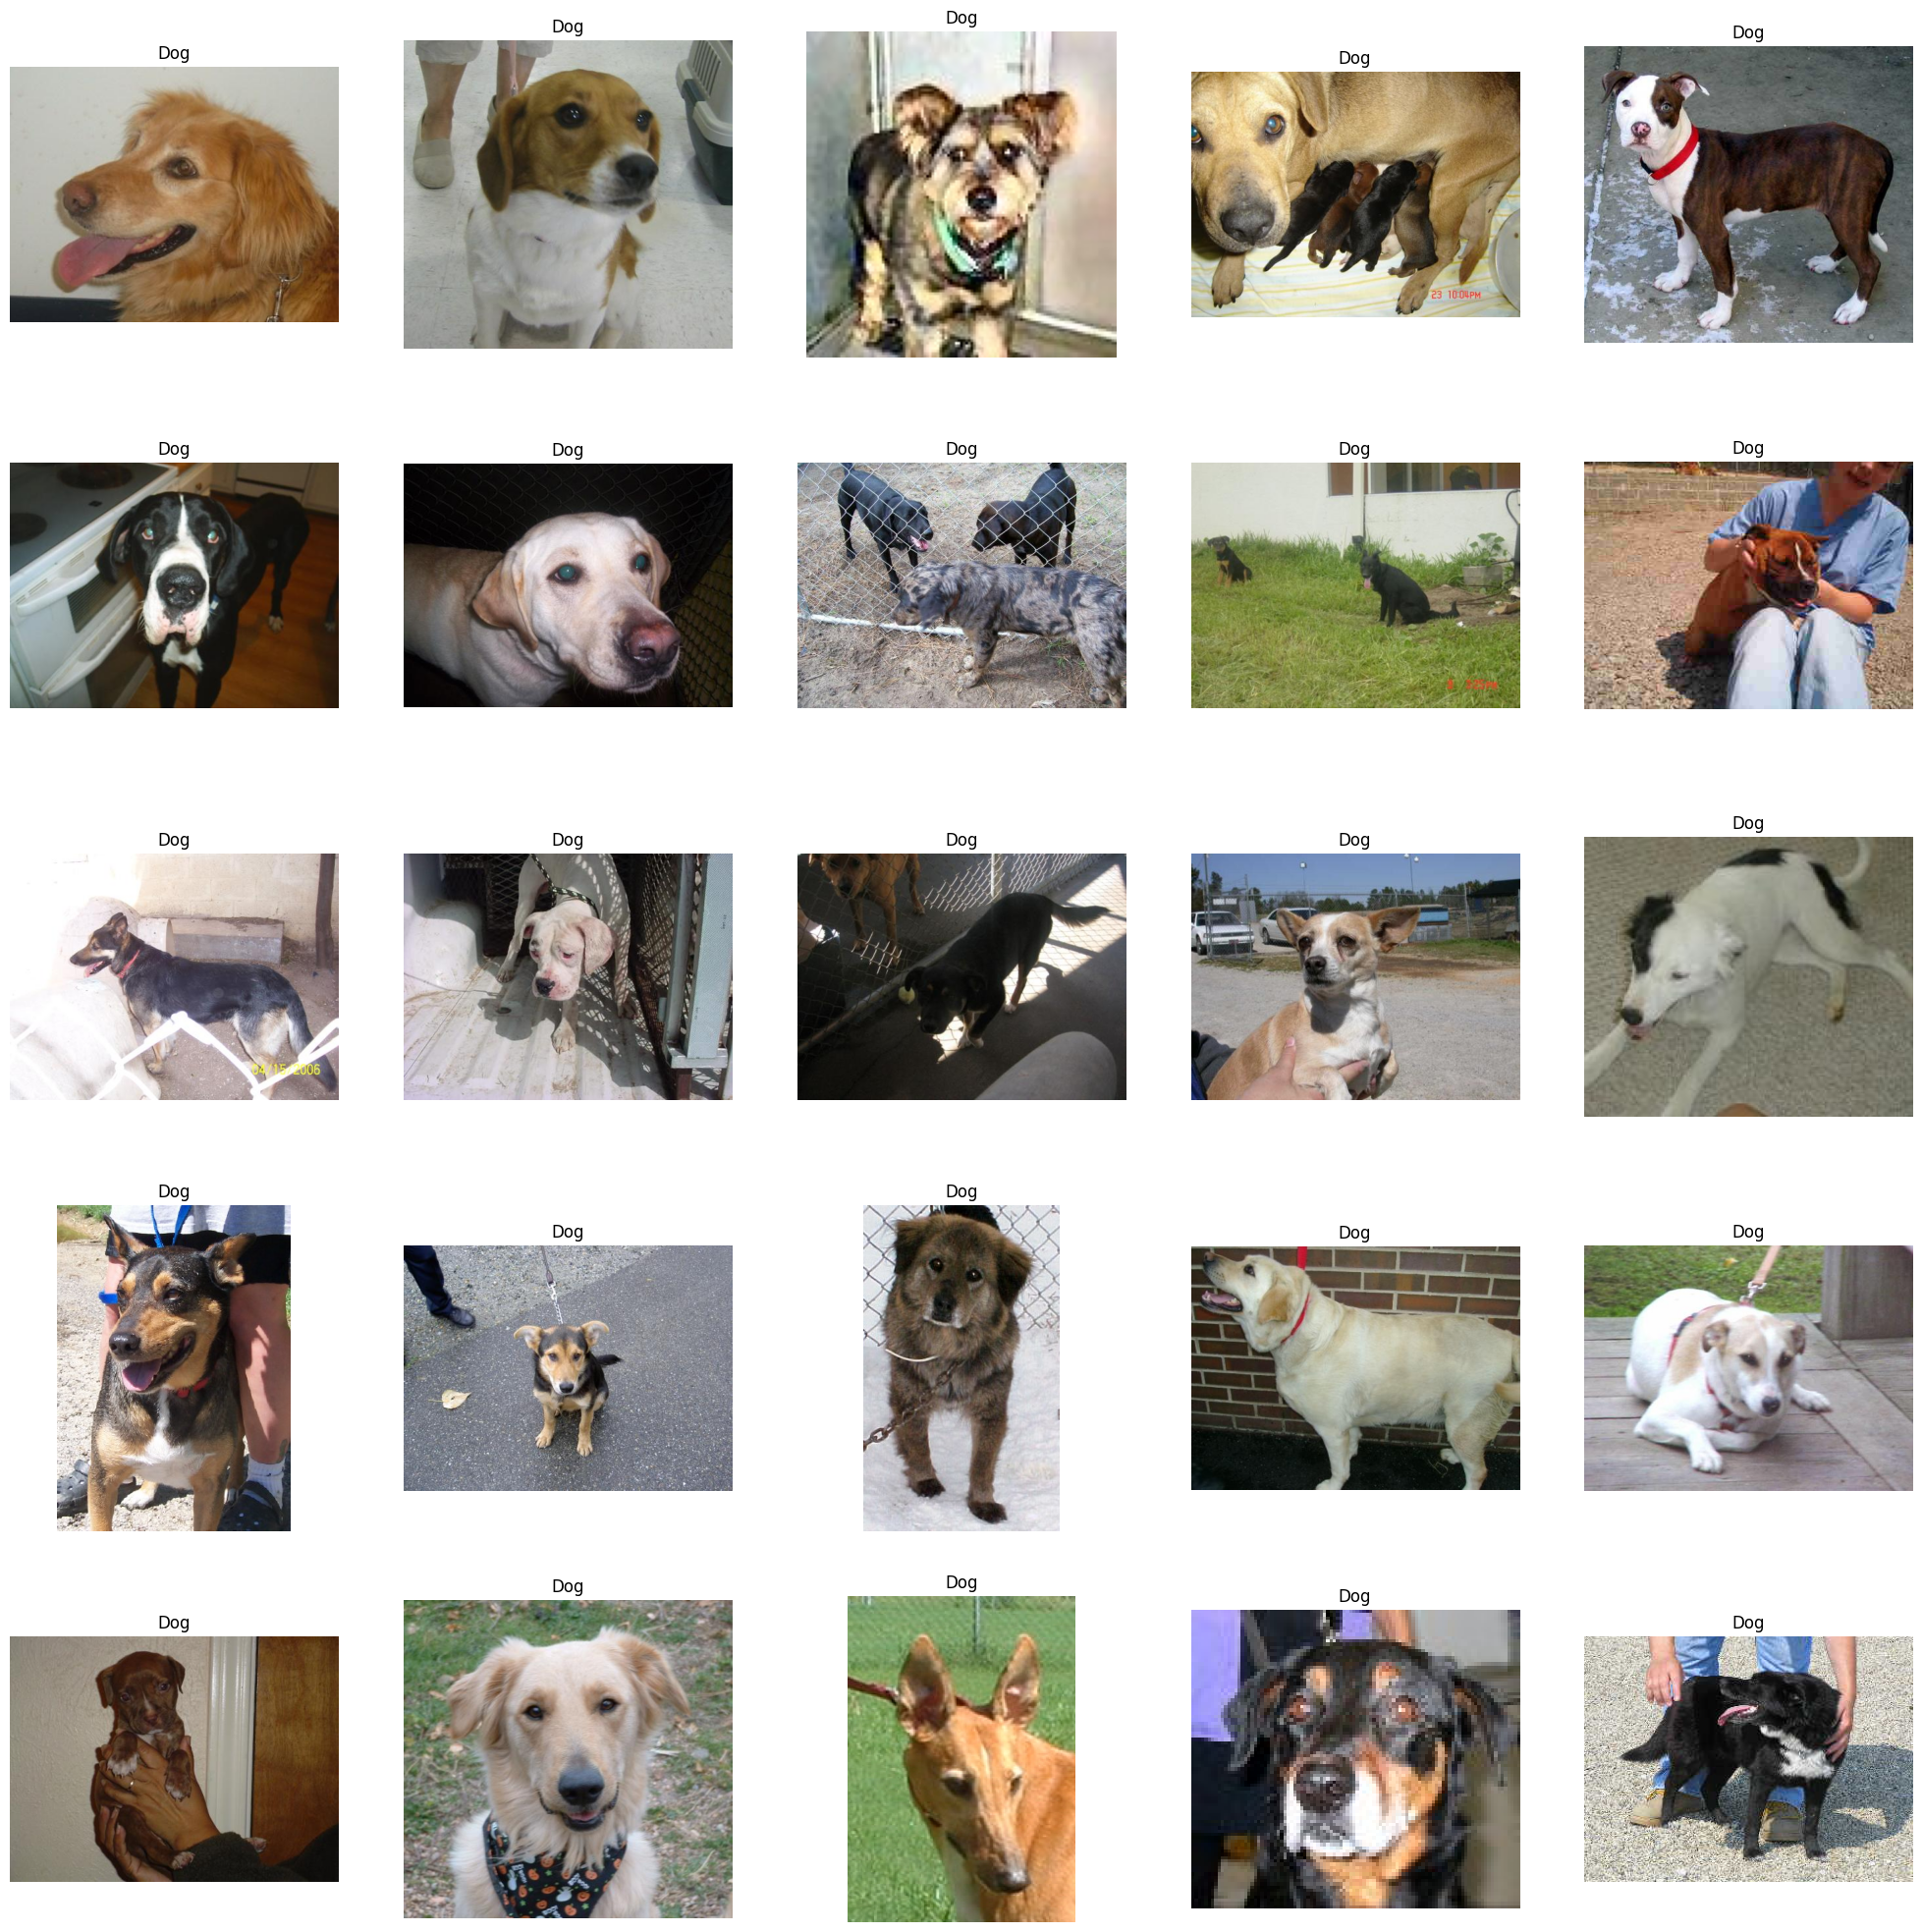

In [15]:
plt.figure(figsize=(25,25))
temp = df[df['label'] == 1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dog')
    plt.axis('off')

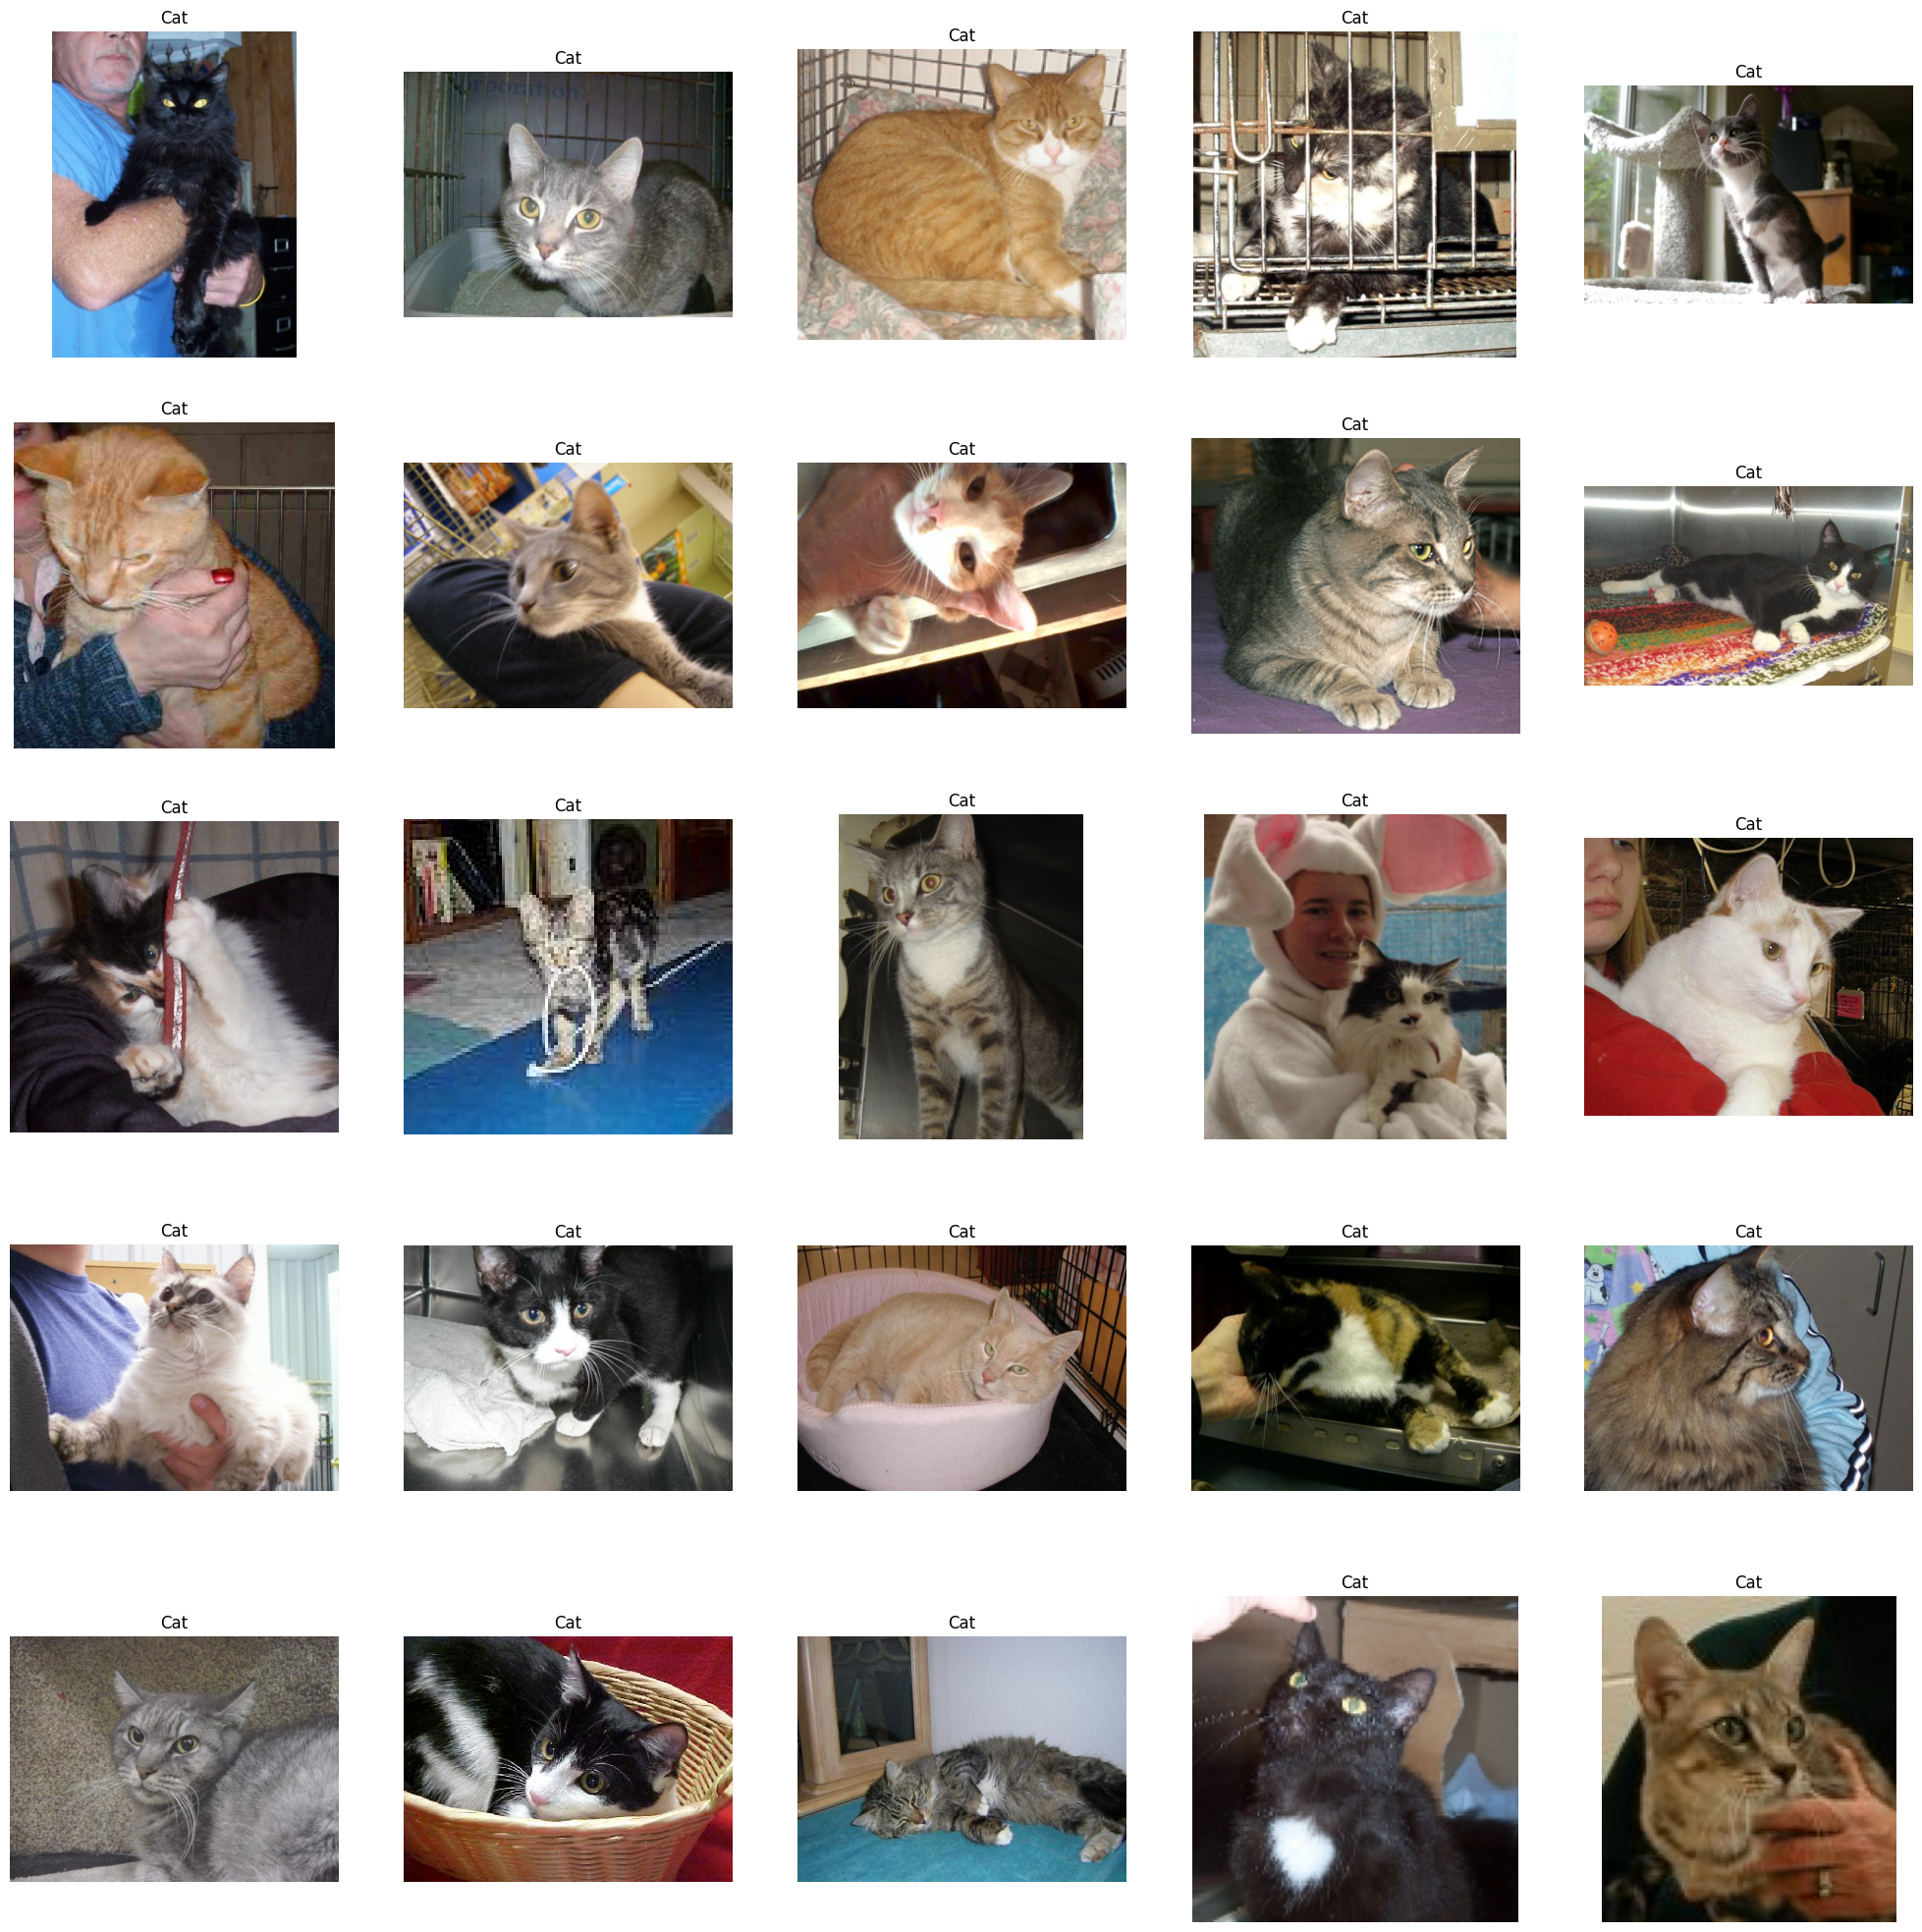

In [16]:
plt.figure(figsize=(25,25))
temp = df[df['label'] == 0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cat')
    plt.axis('off')

<Axes: xlabel='label', ylabel='count'>

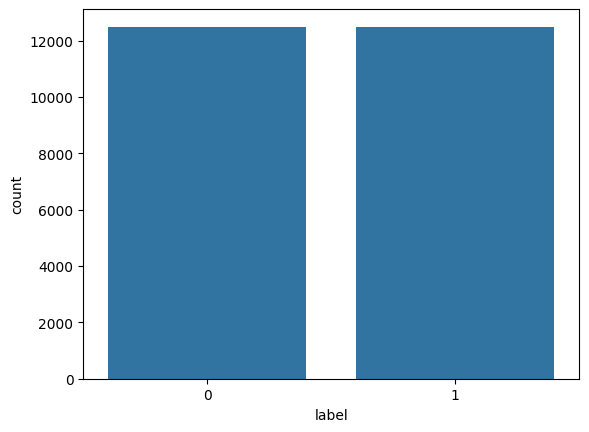

In [17]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [18]:
df['label'] = df['label'].astype('str')

In [19]:
df.head()

images label
0  PetImages\Dog\9050.jpg     1
1    PetImages\Dog\67.jpg     1
2  PetImages\Dog\4581.jpg     1
3  PetImages\Cat\2838.jpg     0
4  PetImages\Cat\6269.jpg     0

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
test.head()

images label
6870    PetImages\Cat\4915.jpg     0
22914   PetImages\Cat\1344.jpg     0
9670    PetImages\Cat\5562.jpg     0
13641   PetImages\Cat\2955.jpg     0
23341  PetImages\Dog\11927.jpg     1

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [23]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.5767 - loss: 0.7032 - val_accuracy: 0.6964 - val_loss: 0.5738
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.7086 - loss: 0.5660 - val_accuracy: 0.7174 - val_loss: 0.5596
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.7247 - loss: 0.5412 - val_accuracy: 0.7484 - val_loss: 0.5035
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.7536 - loss: 0.4983 - val_accuracy: 0.7998 - val_loss: 0.4344
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.7833 - loss: 0.4594 - val_accuracy: 0.8016 - val_loss: 0.4244
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.7912 - loss: 0.4504 - val_accuracy: 0.8154 - val_loss: 0.4042
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.7961 - loss: 0.4312 - val_accuracy: 0.8218 - val_loss: 0.3971
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.8062 - loss: 0.4128 - val_accu

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Trainig Accuracy', marker='o')
plt.plot(epochs, val_acc, 'r', label='Validation Trainig Accuracy', marker='o')
plt.title("Accuracy Graph")
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Trainig Loss', marker='o')
plt.plot(epochs, val_loss, 'r', label='Validation Loss', marker='o')
plt.title("Loss Graph")
plt.legend()
plt.show()
